In [1]:
# %load tmp.py
from grab import Grab
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import Column, Integer, String
from sqlalchemy import Sequence
from RSSgrab import Cocktails
from RSSdb import Connector
import pandas as pd
import numpy as np
import nltk
import itertools
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
con = Connector()
df = con.get_values('cocktails')

In [3]:
df['ing_html'].head(1).values[0]

'<ul>\n<li>2 oz <a class="ingr" href="/db/ingred/214">Light rum</a>\n</li><li>4 oz <a class="ingr" href="/db/ingred/156">Ginger beer</a>\n</li><li>1 twist of <a class="ingr" href="/db/ingred/394">Lemon peel</a>\n</li></ul>\n'

In [4]:
root = ET.fromstring(df['ing_html'].head(1).values[0])

In [5]:
def extractor(string):
    root = ET.fromstring(string)
    dct = {}
    for oz, alc in zip(root.iter('li'), root.iter('a')):
        dct[alc.text] = oz.text
    return dct

In [6]:
df['ing_dict'] = df['ing_html'].apply(extractor)

In [7]:
df_2 = pd.DataFrame()
for idx, line in enumerate(df.iterrows()):
    dct = extractor(line[1]['ing_html'])
    df_2.loc[idx, 'name'] = line[1]['name']
    for key, val in dct.items():
        df_2.loc[idx, key] = val

In [8]:
df_2

,name,Ginger beer,Lemon peel,Light rum,Añejo rum,Ginger ale,Lemon juice,Orange juice,Grapefruit juice,Applejack,...,Shochu,Cactus Juice liqueur,Batida de Coco,Battery,Lakka,Cinzano Bitters,Jolt Cola,Malt liquor,White cranberry juice,Sour apple liqueur
0,A Furlong Too Late,4 oz,1 twist of,2 oz,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Night In Old Mandalay,NaN,1 twist of,1 oz,1 oz,3 oz,1/2 oz,1 oz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A. J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 oz,1 1/2 oz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbey Cocktail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abilene,NaN,NaN,NaN,NaN,NaN,NaN,3 oz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acapulco,NaN,NaN,1 1/2 oz,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adam,NaN,NaN,NaN,NaN,NaN,1 oz,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adonis Cocktail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Affair,NaN,NaN,NaN,NaN,NaN,NaN,2 oz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Affinity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cols = df_2.columns.values.tolist()
cols.remove('name')

In [10]:
comb = list(itertools.combinations(cols, 2))

In [11]:
len(comb)

129795

In [12]:
dct_sim = {}
for i in comb:
    dct_sim[i] = nltk.edit_distance(i[0], i[1])

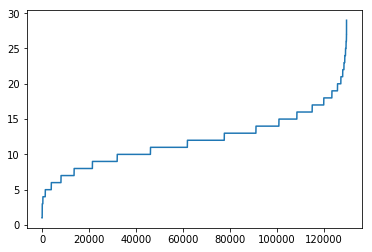

In [13]:
plt.plot(sorted(dct_sim.values()))
plt.show()

In [14]:
list(dct_sim.items())[list(dct_sim.values()).index(max(dct_sim.values()))]

(('Whisky', 'Pineapple-orange-banana juice'), 29)

In [15]:
for item in dct_sim.items():
    if item[1] in [1]:
        print(item[0])

('Anis', 'Anise')
('Whiskey', 'Whisky')
('Cloves', 'Clove')
('Cherry', 'Sherry')


In [16]:
df_2['Whiskey'][~df_2['Whiskey'].isna()]

873                                     2 oz 
1132                                   1 cup 
1193                                1 jigger 
1219                                  2 cups 
1285    1 part Early Times straight Kentucky 
1299    1 part Early Times straight Kentucky 
1317                                 0.75 oz 
1320                                   12 oz 
1397                                1/2 shot 
1410                                  1 part 
1456                                    4 cl 
1495                                    2 oz 
1685                                  1/2 oz 
1721                                  1.5 oz 
1854                                   30 ml 
1930                                  1 shot 
2044                                    3 cl 
2167                                    1 oz 
2334                                    1 oz 
2401                                  1.5 oz 
2450                                1 1/2 oz 
2473                              

In [17]:
df_2.loc[df_2[~df_2['Whiskey'].isna()].index, 'Whisky'] = df_2['Whiskey'][~df_2['Whiskey'].isna()]
df_2.loc[df_2[~df_2['Cloves'].isna()].index, 'Clove'] = df_2['Cloves'][~df_2['Cloves'].isna()]
df_2.loc[df_2[~df_2['Anise'].isna()].index, 'Anis'] = df_2['Anise'][~df_2['Anise'].isna()]
df_2.drop(['Whiskey', 'Cloves', 'Anise'], axis=1, inplace=True)

In [18]:
df_2['Anis'][~df_2['Anis'].isna()]

107                1/2 tsp 
123                1/4 tsp 
176                1/4 tsp 
196                 1/2 oz 
201                  1 tsp 
301                  1 tsp 
313                1 tblsp 
325                1/2 tsp 
328               1 1/2 oz 
439                   1 oz 
452                1/4 tsp 
504                1/4 tsp 
528                 1/2 oz 
541                1/4 tsp 
547                1/4 tsp 
623                 1/2 oz 
628                1/2 tsp 
675                1/4 tsp 
683                1/4 tsp 
720                1/4 tsp 
891                1/2 tsp 
897                1/2 tsp 
912                1/4 tsp 
929                1/4 tsp 
930                1/4 tsp 
935                1/4 tsp 
969                1/4 tsp 
1114        2 tsp crumbled 
1115            50 ml pure 
1117           3-6 crushed 
1127               6 drops 
1607                  1 oz 
4111    1 pinch caraway or 
5839                1 part 
Name: Anis, dtype: object

In [19]:
df_2.shape

(6211, 508)

In [20]:
all_val = df_2[[i for i in df_2.columns if i != 'name']].values.ravel()

In [21]:
lst_val = np.unique(all_val.astype('str')).tolist()
len(lst_val)

1966

In [22]:
mes_srch = lambda x: [i for i in lst_val if ' ' + x in i]
set_mes = {'oz', 'cl', 'tsp', 
           'cup', 'can', 'gal', 
           'L', 'shot', 'count',
           'part', 'dash', 'bottle',
           'glass', 'ml'
          }

dct_mes = {}
for i in set_mes:
    dct_mes[i] = mes_srch(i)

res_mes_lst = []
for i in dct_mes.values():
    res_mes_lst.extend(i)
len(res_mes_lst)

1198

In [23]:
print([i for i in lst_val if i not in res_mes_lst])

['"Mer" non carbonated ', '1 ', '1 - 2 splash ', '1 1/2 ', '1 1/2 dl ', '1 1/2 jigger ', '1 1/2 lb ', '1 1/2 qt ', '1 1/2 scoop ', '1 1/2 splash ', '1 1/2 tblsp ', '1 1/2 tblsp fresh ', '1 1/2 tblsp raspberry ', '1 6-inch ', '1 bag ', '1 black ', '1 blue ', '1 case ', '1 case Molson Canadian ', '1 chunk ', '1 chunk dried ', '1 cocktail ', '1 cracked ', '1 crate ', '1 cube ', '1 cubed ', '1 dl ', '1 dl Schweppes ', '1 dl cold ', '1 drop ', '1 drop Red ', '1 drop blue ', '1 drop green ', '1 drop red ', '1 fifth ', '1 fifth Smirnoff red label ', '1 fifth blue ', '1 fresh ', '1 frozen ', '1 frozen ripe ', '1 green ', '1 ground ', '1 half ', '1 handful ', '1 handful crushed ', '1 inch ', '1 inch Russian ', '1 jigger ', '1 jigger Stoli ', '1 jigger light or dark ', '1 jigger red ', '1 kg ', '1 large ', '1 large box ', '1 large package Black Cherry ', '1 lb ', '1 long strip ', '1 measure ', '1 medium ', '1 medium ripe ', '1 mint green ', '1 one-inch ', '1 or 1/2 pint ', '1 or 1/2 pint Bacardi

In [24]:
df_2.columns

Index(['name', 'Ginger beer', 'Lemon peel', 'Light rum', 'Añejo rum',
       'Ginger ale', 'Lemon juice', 'Orange juice', 'Grapefruit juice',
       'Applejack',
       ...
       'Shochu', 'Cactus Juice liqueur', 'Batida de Coco', 'Battery', 'Lakka',
       'Cinzano Bitters', 'Jolt Cola', 'Malt liquor', 'White cranberry juice',
       'Sour apple liqueur'],
      dtype='object', length=508)

In [25]:
df_3 = df_2.copy()

In [26]:
df_3 = df_3.astype('object')

In [27]:
df_3[~df_3.isna()] = 1

In [28]:
df_3.fillna(0, inplace=True)

In [29]:
df_3['name'] = df_2['name']

In [30]:
df_3.drop([True], axis=1,inplace=True)

ValueError: labels [ True] not contained in axis

In [33]:
con.create_table(df_3, 'proc_table')

In [34]:
con.create_table(df_2, 'crude_table')